https://github.com/computervisionpro/yt/blob/main/line-text-segmentation/tutorial20.ipynb

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

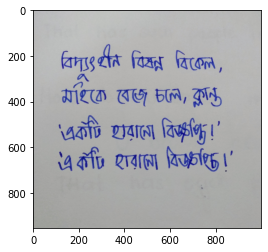

In [ ]:
img = cv2.imread('6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:
    
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
  
plt.imshow(img);

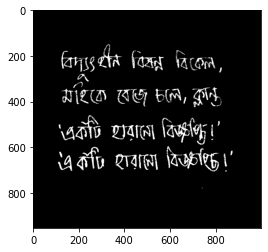

In [ ]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img);


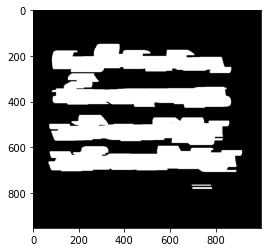

In [ ]:
#dilation
kernel = np.ones((5,85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');

In [ ]:
def get_white_percentage(thresh_img, x, y, w, h):
  s = 0
  roi = thresh_img[y: y+h, x: x+w]

  for row in roi:
    s += sum(row)/255

  return s

print(get_white_percentage(thresh_img, 0,0,100,100))


0.0


In [ ]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

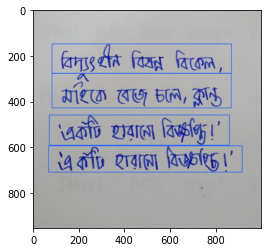

In [ ]:
img2 = img.copy()

lines = []

for contour in sorted_contours_lines:
    
    x,y,w,h = cv2.boundingRect(contour)

    if get_white_percentage(thresh_img, x,y,w,h) < 200:
      continue

    # print(get_white_percentage(x,y,w,h))
    lines.append((x, y, w, h))
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
    
plt.imshow(img2);

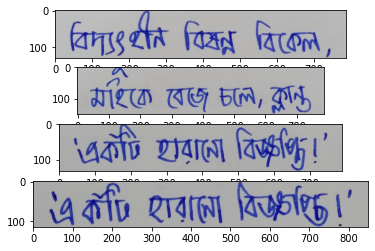

In [ ]:
i = 1

for line in lines:
  x, y, w, h = line
  roi = img[y: y+h, x: x+w]
  # print(line)
  plt.subplot(len(lines), 1, i)
  plt.imshow(roi)
  i = i+1

# cv2.imwrite('test.jpg', lines[6])

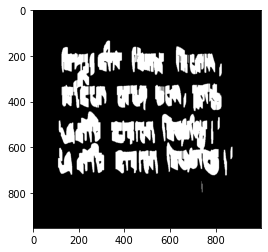

In [ ]:
#dilation
kernel = np.ones((35,1), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

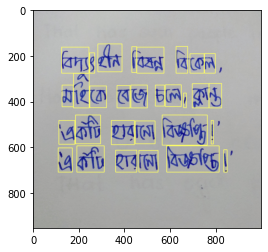

In [ ]:
img3 = img.copy()
words = []

for line in lines:

    words_in_line = []
    
    # roi of each line
    x, y, w, h = line
    roi_line = dilated2[y:y+h, x:x+w]
    
    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])
    
    for word in sorted_contour_words:
        
        if cv2.contourArea(word) < 400:
            continue
        
        x2, y2, w2, h2 = cv2.boundingRect(word)
        # print('roi: ', len(roi[0][0]))
        words_in_line.append((x+x2, y+y2, w2, h2))

        # print(len(words_in_line))

        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)

    words.append(words_in_line.copy())
    words_in_line.clear()
    # print('lenw: ', len(words))
        
plt.imshow(img3);

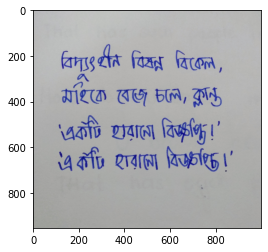

In [ ]:
# ninth_word = words_list[8]
# roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
# roi_9 = words[4][0]
plt.imshow(img);

In [ ]:
i = 1;
ncol = max([len(line) for line in words])
nrow = len(words)

plt.figure(figsize=(300,300))
for words_in_line in words:
  for word in words_in_line:
    x, y, w, h = word
    roi = img[y:y+h, x:x+w]
    plt.subplot(nrow, ncol, i)
    i += 1
    # if i>nrow*10: break
    plt.imshow(roi)

  for n in range(ncol - len(words_in_line)):
    plt.subplot(nrow, ncol, i)
    i += 1
    plt.imshow(roi)
  # if i>nrow*10: break

# for word in words[0]:
#     x, y, w, h = word
#     roi = img[y:y+h, x:x+w]
#     plt.subplot(1, len(words[0]), i)
#     i += 1
#     # if i>nrow*10: break
#     plt.imshow(roi)